***Importing Libraries***

In [1]:
import pandas as pd #To read dataset/inputs in to dataframe
import seaborn as sns #To get visual representation of metrics/dataset
import matplotlib.pyplot as plt #To plot a graph
%matplotlib inline
import warnings #To ignore warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_curve, auc#To plot ROC curve
from keras.layers import Dense, InputLayer, Dropout, Flatten, BatchNormalization, Conv1D#For CNN Layers
from keras.layers.pooling import MaxPooling1D#max pooling layer

from unidecode import unidecode #To clean text/data
import re #To clean text/data
from re import sub #To clean text/data


from sklearn.model_selection import train_test_split #Splitting the data

from sklearn.feature_extraction.text import CountVectorizer #For BoW using Countvectorizer

from sklearn.naive_bayes import MultinomialNB #Importing naive bayes model
import numpy as np #For array operations
from sklearn import metrics #For evaluation of metrics
from sklearn.metrics import classification_report,confusion_matrix #Generating classification report
import itertools #Used in Confusion matrix visualization
from sklearn.feature_extraction.text import TfidfVectorizer #For Tfidf model 
from sklearn.svm import LinearSVC #For importing SVM model
from tensorflow.keras.preprocessing.text import Tokenizer  #For Tokenizing
from tensorflow.keras.preprocessing.sequence import pad_sequences  #For sequence padding
import tensorflow as tf #For TensorFlow libraries
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout #LSTM architecture libraries
from tensorflow.keras.models import Sequential     #For the model
import os #For os functionalities
from tensorflow.keras.callbacks import ModelCheckpoint #For write the model
from tensorflow.keras.models import load_model #For loading model

***Reading the data from the IMDB csv file named as movie_data***

In [2]:
#Reading the data in csv file in to dataframe
df = pd.read_csv('movie_data.csv')

In [3]:
#Exploring data
df.head()
#df.shape

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0


****Analysing csv file data***

In [4]:
# Getting total number of positive and negative reviews from the datset

df['sentiment'].value_counts()

# 1- represents positive review
# 2- represents negative review

1    25000
0    25000
Name: sentiment, dtype: int64

             Reviews count


<AxesSubplot:>

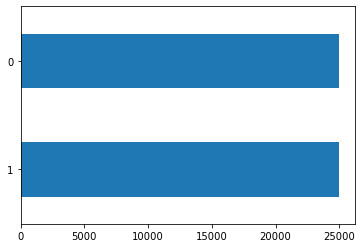

In [5]:
print("             Reviews count")
df.sentiment.value_counts().sort_values().plot(kind = 'barh')

In [5]:
#This shows our dataset is balanced with both the classes

***Cleaning the data***

In [6]:
#After many data cleaning techniques we merged all our ideas into this function and using unidecode to remove polish letters.
def clean_data(text,remove_polish_letters):
    ''' Pre process and convert texts to a list of words 
    method inspired by method from eliorc github repo: https://github.com/eliorc/Medium/blob/master/MaLSTM.ipynb'''
    text = remove_polish_letters(text)
    text = str(text)
    text = text.lower()

    # Clean the text
    text = sub(r"[^A-Za-z0-9^,!?.\/'+]", " ", text)
    #Removes special characters
    text = sub(r"\+", " plus ", text)
    text = sub(r",", " ", text)
    text = sub(r"\.", " ", text)
    text = sub(r"!", " ! ", text)
    text = sub(r"\?", " ? ", text)
    text = sub(r"'", " ", text)
    #Removes : with and without spaces
    text = sub(r":", " : ", text)
    #Removes matches more than 2 white spaces
    text = sub(r"\s{2,}", " ", text)
    #Removes digits
    text = sub(" \d+", " ", text)

    #text = text.split()

    return text
#Applying clean_data to every review in our dataset
df.review = df.review.apply(lambda x: clean_data(x, unidecode))

In [7]:
df.head()

,review,sentiment
0,in the teenager martha moxley maggie grace mo...,1
1,ok so i really like kris kristofferson and his...,0
2,spoiler do not read this if you think about w...,0
3,hi for all the people who have seen this wonde...,1
4,i recently bought the dvd forgetting just how ...,0


In [8]:
df['review'][0]

'in  the teenager martha moxley maggie grace moves to the high class area of belle haven greenwich connecticut on the mischief night eve of halloween she was murdered in the backyard of her house and her murder remained unsolved twenty two years later the writer mark fuhrman christopher meloni who is a former la detective that has fallen in disgrace for perjury in o j simpson trial and moved to idaho decides to investigate the case with his partner stephen weeks andrew mitchell with the purpose of writing a book the locals squirm and do not welcome them but with the support of the retired detective steve carroll robert forster that was in charge of the investigation in the  s they discover the criminal and a net of power and money to cover the murder br / br / murder in greenwich is a good tv movie with the true story of a murder of a fifteen years old girl that was committed by a wealthy teenager whose mother was a kennedy the powerful and rich family used their influence to cover the

In [9]:
df.shape

(50000, 2)

In [10]:
import nltk
#nltk.download('stopwords')

In [11]:
from nltk.corpus import stopwords#Removing stopwords
from nltk.stem.porter import PorterStemmer#For stemming
from nltk.tokenize.toktok import ToktokTokenizer#For Tokenizing
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [12]:
#df['review'][0]

In [13]:
#df.head()

In [14]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
df['review']=df['review'].apply(simple_stemmer)


In [15]:
df['review'][0]

'in the teenag martha moxley maggi grace move to the high class area of bell haven greenwich connecticut on the mischief night eve of halloween she wa murder in the backyard of her hous and her murder remain unsolv twenti two year later the writer mark fuhrman christoph meloni who is a former la detect that ha fallen in disgrac for perjuri in o j simpson trial and move to idaho decid to investig the case with hi partner stephen week andrew mitchel with the purpos of write a book the local squirm and do not welcom them but with the support of the retir detect steve carrol robert forster that wa in charg of the investig in the s they discov the crimin and a net of power and money to cover the murder br / br / murder in greenwich is a good tv movi with the true stori of a murder of a fifteen year old girl that wa commit by a wealthi teenag whose mother wa a kennedi the power and rich famili use their influenc to cover the murder for more than twenti year howev a snoopi detect and convict 

In [16]:
df.head()

,review,sentiment
0,in the teenag martha moxley maggi grace move t...,1
1,ok so i realli like kri kristofferson and hi u...,0
2,spoiler do not read thi if you think about wat...,0
3,hi for all the peopl who have seen thi wonder ...,1
4,i recent bought the dvd forget just how much i...,0


In [17]:
#set stopwords to english
stop=set(stopwords.words('english'))

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
df['review']=df['review'].apply(remove_stopwords)

In [18]:
df.head()

,review,sentiment
0,teenag martha moxley maggi grace move high cla...,1
1,ok realli like kri kristofferson hi usual easi...,0
2,spoiler read thi think watch movi although wou...,0
3,hi peopl seen thi wonder movi im sure thet wou...,1
4,recent bought dvd forget much hate movi versio...,0


In [19]:
df['review'][0]

'teenag martha moxley maggi grace move high class area bell greenwich connecticut mischief night eve halloween wa murder backyard hous murder remain unsolv twenti two year later writer mark fuhrman christoph meloni former la detect ha fallen disgrac perjuri j simpson trial move idaho decid investig case hi partner stephen week andrew mitchel purpos write book local squirm welcom support retir detect steve carrol robert forster wa charg investig discov crimin net power money cover murder br / br / murder greenwich good tv movi true stori murder fifteen year old girl wa commit wealthi teenag whose mother wa kennedi power rich famili use influenc cover murder twenti year howev snoopi detect convict perjur disgrac wa abl disclos hideou crime wa commit screenplay show investig mark last day martha parallel lack emot dramat vote seven br / br / titl brazil avail'

In [45]:
df.head()

,review,sentiment
0,teenag martha moxley maggi grace move high cla...,1
1,ok realli like kri kristofferson hi usual easi...,0
2,spoiler read thi think watch movi although wou...,0
3,hi peopl seen thi wonder movi im sure thet wou...,1
4,recent bought dvd forget much hate movi versio...,0


***Analysing the frequency distribution of data***

In [20]:
def freq_plot(top_n):
    dfarray = df.values
    text = dfarray[:,0]
    np.array(map(str, text))
    text = tokenizer.tokenize(text)
    #tokens = [t for t in text.split()]
    #print(tokens)
    #Plotting the frequency distribution graphs with the tokens
    freq = nltk.FreqDist(text)
    freq.plot(top_n, cumulative=False)

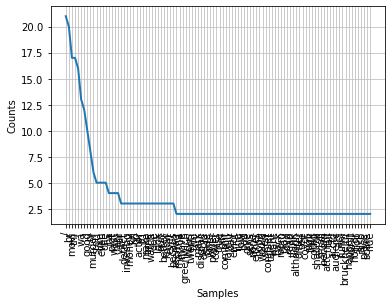

In [22]:
freq_plot(100)

***Preparing the data for training***

In [23]:
#Reading all the values of corpus in to an array.

df_array = df.values
#print(df_array)

In [24]:
#Reading reviews in to X
X=df_array[:,0]

#Reading target positive or negative in y
y=df_array[:,1]
#Changing the type of y from string to int
y=y.astype('int')

Now our data is ready to split. For splitting we use skleran train_test_split.

***Splitting the data for training and testing***

In [25]:
# Splitting our data into train and test sets
# we will use 80% training set and 20% test set

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2, shuffle=False)

In [26]:
#Checking the shape of data splitted

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
#X_train.shape
#y_train.shape
#X_test.shape
#y_test.shape

(40000,) (40000,)
(10000,) (10000,)


***Features generation for model***

***Bags of words model***

In [27]:
#This model is used to convert text documents to numerical vectors or bag of words.


vec=CountVectorizer()
vec.fit(X_train)
#vec.vocabulary_
#print(vec.get_feature_names_out())
#print(len(vec.get_feature_names()))

#specifying upper and lower dims and removing stop words
#These dimensions will help us to remove the numerical values or single values
vec=CountVectorizer(stop_words='english',min_df=.03,max_df=0.8)

vec.fit(X_train)
#vec.vocabulary_

#print(vec.get_feature_names())
#print(len(vec.get_feature_names()))

CountVectorizer(max_df=0.8, min_df=0.03, stop_words='english')

In [28]:
#Ref:https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
#The first 10 generated features by countvectorizer

In [46]:
vec.get_feature_names()[1:20]

['abl',
 'abov',
 'absolut',
 'act',
 'action',
 'actor',
 'actress',
 'actual',
 'ad',
 'add',
 'age',
 'ago',
 'agre',
 'allow',
 'alon',
 'alreadi',
 'alway',
 'amaz',
 'american']

When we transform the matrix we get the sparse matrix which does not contain zeros and is a compressed format for easier computation. We use the command to .toarray() to get the ones and zeros back.

***For train set:***

In [47]:
x_train_transformed=vec.transform(X_train)
x_train_transformed

<40000x560 sparse matrix of type '<class 'numpy.int64'>'
	with 1820907 stored elements in Compressed Sparse Row format>

In [48]:
#converting transformed matrix to an array
x_train=x_train_transformed.toarray()

In [51]:
print(x_train_transformed[0])

  (0, 1)	1
  (0, 56)	1
  (0, 59)	4
  (0, 73)	1
  (0, 88)	1
  (0, 108)	2
  (0, 118)	1
  (0, 123)	1
  (0, 136)	1
  (0, 150)	1
  (0, 178)	1
  (0, 207)	1
  (0, 211)	1
  (0, 218)	1
  (0, 232)	1
  (0, 233)	1
  (0, 245)	1
  (0, 246)	1
  (0, 271)	1
  (0, 274)	1
  (0, 288)	1
  (0, 316)	1
  (0, 318)	1
  (0, 319)	1
  (0, 321)	6
  (0, 329)	1
  (0, 341)	1
  (0, 375)	2
  (0, 400)	1
  (0, 411)	1
  (0, 471)	1
  (0, 480)	1
  (0, 499)	1
  (0, 508)	1
  (0, 511)	1
  (0, 518)	1
  (0, 529)	6
  (0, 553)	1
  (0, 554)	1
  (0, 558)	3


In [52]:
#This gives the representation of topics and words in the topics.
pd.DataFrame(x_train_transformed.toarray(),columns=vec.get_feature_names_out()).head()

,10,abl,abov,absolut,act,action,actor,actress,actual,ad,...,wors,worst,worth,write,writer,written,wrong,ye,year,young
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,3,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


For Test set:

In [53]:
x_test_transformed=vec.transform(X_test)
x_test_transformed

<10000x560 sparse matrix of type '<class 'numpy.int64'>'
	with 456712 stored elements in Compressed Sparse Row format>

In [54]:
x_test=x_test_transformed.toarray()

In [55]:
pd.DataFrame(x_test_transformed.toarray(),columns=vec.get_feature_names_out()).head()

,10,abl,abov,absolut,act,action,actor,actress,actual,ad,...,wors,worst,worth,write,writer,written,wrong,ye,year,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


***Term Frequency-Inverse Document Frequency model (TFIDF)***

In [56]:
tfidf = TfidfVectorizer(max_features = 5000)

In [57]:
#Transforming all reviews before splitting
X_train_tf = tfidf.fit_transform(X_train)


In [58]:
X_test_tf = tfidf.transform(X_test)

In [93]:
tfidf.get_feature_names()[50:60]

['actual',
 'ad',
 'adam',
 'adapt',
 'add',
 'addict',
 'addit',
 'address',
 'adequ',
 'adjust']

In [60]:
X_train_tf.shape

(40000, 5000)

In [61]:
print(X_train_tf[0])

  (0, 301)	0.08141496769690561
  (0, 534)	0.10306856110180874
  (0, 4527)	0.06125733410048056
  (0, 3946)	0.08848680754274528
  (0, 4811)	0.08457890310666494
  (0, 1332)	0.07436599200684664
  (0, 1454)	0.06223179956603692
  (0, 2525)	0.06024394317552591
  (0, 3197)	0.09746119052112275
  (0, 1117)	0.04916412349941396
  (0, 2542)	0.05221834780792389
  (0, 4001)	0.04063944049986693
  (0, 3878)	0.07576002870006225
  (0, 1036)	0.07363921859188746
  (0, 2099)	0.10583294576888459
  (0, 7)	0.06483275737304293
  (0, 969)	0.09326421824503593
  (0, 2180)	0.050759304468641055
  (0, 2294)	0.08576855970027004
  (0, 4726)	0.04580643746185586
  (0, 1623)	0.055484754730491616
  (0, 3713)	0.077286735150376
  (0, 2480)	0.10343550319844716
  (0, 2925)	0.06504359594050382
  (0, 4900)	0.07035863390772912
  :	:
  (0, 2521)	0.08085976477233135
  (0, 1767)	0.07997507714063443
  (0, 774)	0.0863021402024063
  (0, 2744)	0.1472204840353094
  (0, 4970)	0.0616647929736511
  (0, 2545)	0.058268059727137174
  (0, 4982)

In [62]:
print("tf_train reviews ",X_train_tf.shape)
print("tf_test reviews ",X_test_tf.shape)

tf_train reviews  (40000, 5000)
tf_test reviews  (10000, 5000)


***Naive Bayes for Bag of Words and tfidf***

In [63]:
#Model

mnb=MultinomialNB()
#In this model we x_train and y_train are the inputs
#This model uses alpha which is a 1 for laplacian smoothing technique.
#In this model because of this we can avoid zero probability
#Ref:https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

***Training and Predicting***

In [64]:
#fitting the model on training data of BoW
mnb_nv_BoW = mnb.fit(x_train_transformed,y_train)
y_pred_Bow = mnb.predict(x_test_transformed)

In [66]:
print("Predicted array for BoW",y_pred_Bow)
print("Original array for BoW ",y_test)

Predicted array for BoW [1 0 1 ... 0 0 1]
Original array for BoW  [1 0 1 ... 0 0 1]


In [67]:
#Getting the probability of predictions

probabilty_prediction=mnb_nv_BoW.predict_proba(x_test_transformed)
probabilty_prediction
#The above output shows probabilities of prediction for '0' and '1'
print("Probability of first prediction is ",np.argmax(probabilty_prediction[0]))
#1 is positive review
#0 is negative review

Probability of first prediction is  1


In [68]:
probabilty_prediction[:10]

array([[1.22943167e-01, 8.77056833e-01],
       [5.06424790e-01, 4.93575210e-01],
       [1.52305895e-01, 8.47694105e-01],
       [9.99986173e-01, 1.38274067e-05],
       [2.92685994e-01, 7.07314006e-01],
       [1.00000000e+00, 1.02532431e-24],
       [9.72219719e-03, 9.90277803e-01],
       [9.99999856e-01, 1.43768167e-07],
       [2.19117831e-01, 7.80882169e-01],
       [2.20442423e-01, 7.79557577e-01]])

In [69]:
#fitting the model on training data of tfidf
mnb_nv_tfidf = mnb.fit(X_train_tf,y_train)
y_pred_tf = mnb.predict(X_test_tf)

In [70]:
print("Predicted array for tfid",y_pred_tf)
print("Original array for tfid ",y_test)

Predicted array for tfid [1 1 1 ... 0 0 1]
Original array for tfid  [1 0 1 ... 0 0 1]


In [71]:
#Getting the probability of predictions

probabilty_prediction=mnb_nv_BoW.predict_proba(X_test_tf)
probabilty_prediction
#The above output shows probabilities of prediction for '0' and '1'
print("Probability of first prediction is ",np.argmax(probabilty_prediction[0]))
#1 is positive review
#0 is negative review

Probability of first prediction is  1


In [72]:
probabilty_prediction[:10]

array([[0.18464421, 0.81535579],
       [0.49837921, 0.50162079],
       [0.31664862, 0.68335138],
       [0.72284833, 0.27715167],
       [0.3310793 , 0.6689207 ],
       [0.93089732, 0.06910268],
       [0.07871625, 0.92128375],
       [0.86420841, 0.13579159],
       [0.52695014, 0.47304986],
       [0.37788334, 0.62211666]])

In [73]:
print("Accuracy for Naive Bayes model on BoW",metrics.accuracy_score(y_test,y_pred_Bow))
print("Accuracy for Naive Bayes model on tfidf",metrics.accuracy_score(y_test,y_pred_tf ))

Accuracy for Naive Bayes model on BoW 0.813
Accuracy for Naive Bayes model on tfidf 0.8442


In [74]:
print("Confusion Matrix for Naive Bayes Bow")
confusion=metrics.confusion_matrix(y_test,y_pred_Bow)
print(confusion)
print("Confusion Matrix for Naive Bayes tfidf")
confusion=metrics.confusion_matrix(y_test,y_pred_tf)
print(confusion)

Confusion Matrix for Naive Bayes Bow
[[4038  975]
 [ 895 4092]]
Confusion Matrix for Naive Bayes tfidf
[[4214  799]
 [ 759 4228]]


In [75]:
print("Classification Report for Naive Bayes Classifier for BoW\n\n",classification_report(y_test,y_pred_Bow))
print("Classification Report for Naive Bayes Classifier for tfidf\n\n",classification_report(y_test,y_pred_tf))

Classification Report for Naive Bayes Classifier for BoW

               precision    recall  f1-score   support

           0       0.82      0.81      0.81      5013
           1       0.81      0.82      0.81      4987

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000

Classification Report for Naive Bayes Classifier for tfidf

               precision    recall  f1-score   support

           0       0.85      0.84      0.84      5013
           1       0.84      0.85      0.84      4987

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



FUNCTION TO VISUALIZE CONFUSION MATRIX

In [76]:
#Function to visualize confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix
[[4038  975]
 [ 895 4092]]
Confusion matrix
[[4214  799]
 [ 759 4228]]


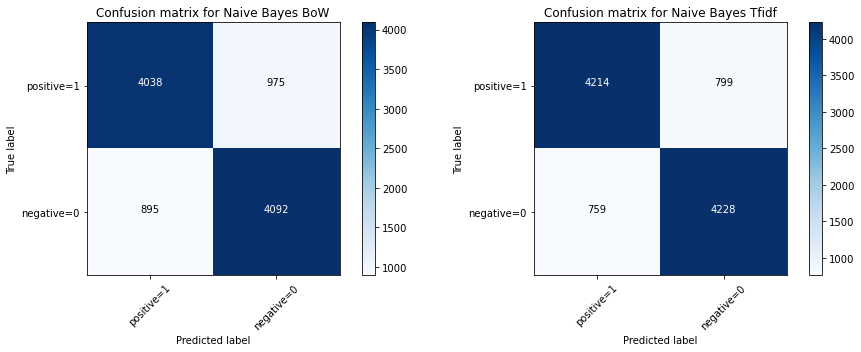

In [77]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred_Bow)
cnf_matrix1 = confusion_matrix(y_test,y_pred_tf)
#print(cnf_matrix)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure(figsize=(13,5))
plt.subplot(1, 2, 1)
plot_confusion_matrix(cnf_matrix, classes=['positive=1','negative=0'],normalize= False,  title='Confusion matrix for Naive Bayes BoW')
plt.subplot(1, 2, 2)
plot_confusion_matrix(cnf_matrix1, classes=['positive=1','negative=0'],normalize= False,  title='Confusion matrix for Naive Bayes Tfidf')

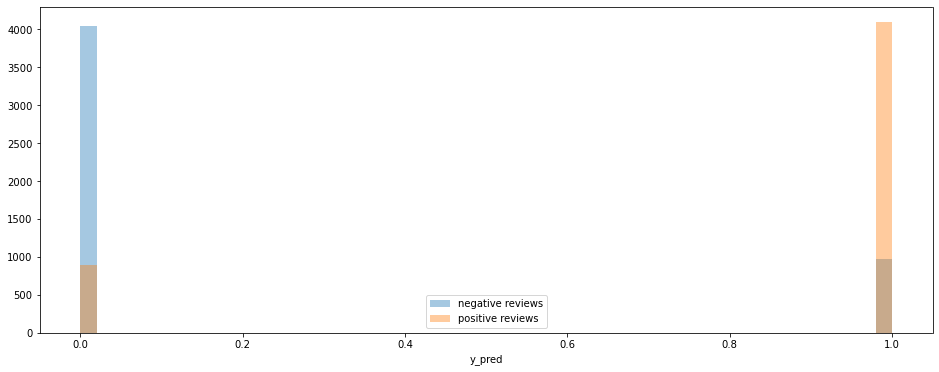

In [78]:
#Prediction for BoW Naive Bayes model

df_pred = pd.DataFrame(data={'y_actual': y_test, 'y_pred': y_pred_Bow})

plt.figure(figsize=(16, 6))

msk = df_pred['y_actual'] == 0
sns.distplot(df_pred.loc[msk, 'y_pred'], label='negative reviews', kde=False)
sns.distplot(df_pred.loc[~msk, 'y_pred'], label='positive reviews', kde=False)


plt.legend()


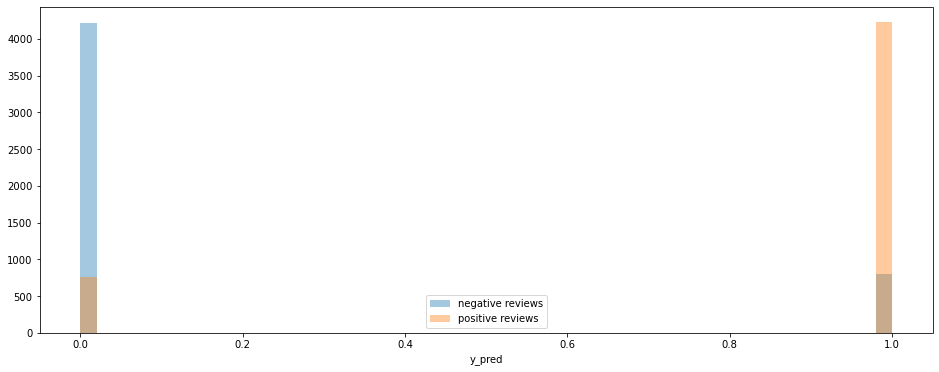

In [79]:
#Prediction for BoW Naive Bayes model

df_pred = pd.DataFrame(data={'y_actual': y_test, 'y_pred': y_pred_tf})

plt.figure(figsize=(16, 6))

msk = df_pred['y_actual'] == 0
sns.distplot(df_pred.loc[msk, 'y_pred'], label='negative reviews', kde=False)
sns.distplot(df_pred.loc[~msk, 'y_pred'], label='positive reviews', kde=False)


plt.legend()

***SVM MODEL***

In [80]:
#From sklearn we choose Linersvc() to work for SVM model
#Ref:https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

In [81]:
#In our research we read that this model is good on large number of samples.
#So when we use a big dataset like this. We want to analyze the difference of results generated between this model and Naive Bayes model
#this model by default take 'l2' penality. It is also more flexible with loss.
#In our study we understood that the naive bayes model treats all the features independent, but SVM model takes the interaction between features to certain degree.
#Naivey is probabilistic in nature, and svm is geometric in nature. 

In [82]:
#Transfer learning Model 
svm = LinearSVC()

***Training & Predicting***

In [83]:
#svm model for BoW
svm_bow=svm.fit(x_train_transformed,y_train)
y_pred_svm = svm_bow.predict(x_test_transformed)

In [84]:
#svm model for Tfidf
svm_tf=svm.fit(X_train_tf,y_train)
y_pred_svm_tf=svm_tf.predict(X_test_tf)

In [85]:
print("Predicted values by svm BoW",y_pred_svm)
print("Original values by svm BoW",y_test)

print("Predicted values by svm Tfidf",y_pred_svm_tf)
print("Original values by svm Tfidf",y_test)

Predicted values by svm BoW [1 1 1 ... 0 1 1]
Original values by svm BoW [1 0 1 ... 0 0 1]
Predicted values by svm Tfidf [1 1 1 ... 0 0 1]
Original values by svm Tfidf [1 0 1 ... 0 0 1]


***Evaluating***

In [86]:
print("Accuracy for svm model on BoW",metrics.accuracy_score(y_test,y_pred_svm))
print("Accuracy for svm model on tfidf",metrics.accuracy_score(y_test,y_pred_svm_tf))

Accuracy for svm model on BoW 0.8439
Accuracy for svm model on tfidf 0.8829


In [87]:
print("Confusion Matrix for svm Bow")
confusion=metrics.confusion_matrix(y_test,y_pred_svm)
print(confusion)
print("Confusion Matrix for svm tfidf")
confusion=metrics.confusion_matrix(y_test,y_pred_svm_tf)
print(confusion)

Confusion Matrix for svm Bow
[[4200  813]
 [ 748 4239]]
Confusion Matrix for svm tfidf
[[4408  605]
 [ 566 4421]]


In [88]:
print("Classification Report for svm Classifier for BoW\n\n",classification_report(y_test,y_pred_svm))
print("Classification Report for svm Classifier for tfidf\n\n",classification_report(y_test,y_pred_svm_tf))

Classification Report for svm Classifier for BoW

               precision    recall  f1-score   support

           0       0.85      0.84      0.84      5013
           1       0.84      0.85      0.84      4987

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

Classification Report for svm Classifier for tfidf

               precision    recall  f1-score   support

           0       0.89      0.88      0.88      5013
           1       0.88      0.89      0.88      4987

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



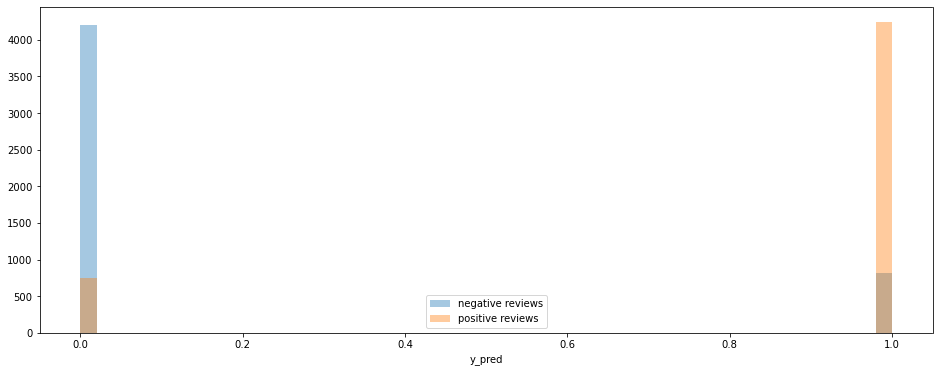

In [89]:
#Prediction for BoW svm model

df_pred = pd.DataFrame(data={'y_actual': y_test, 'y_pred': y_pred_svm})

plt.figure(figsize=(16, 6))

msk = df_pred['y_actual'] == 0
sns.distplot(df_pred.loc[msk, 'y_pred'], label='negative reviews', kde=False)
sns.distplot(df_pred.loc[~msk, 'y_pred'], label='positive reviews', kde=False)


plt.legend()

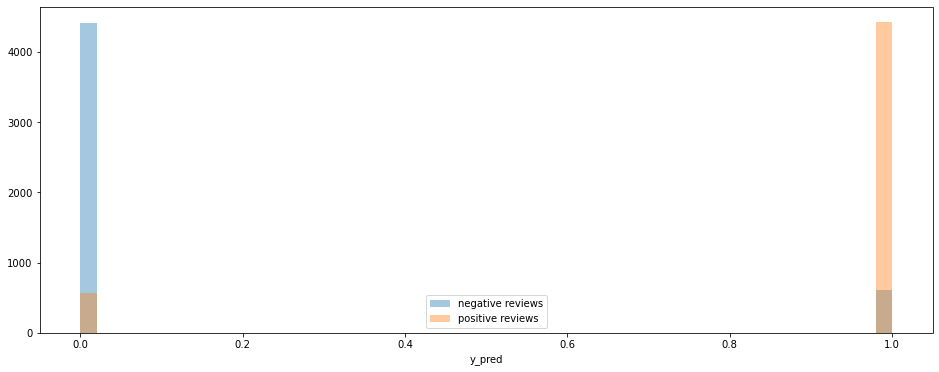

In [90]:
#Prediction for svm model for tfidf

df_pred = pd.DataFrame(data={'y_actual': y_test, 'y_pred': y_pred_svm_tf})

plt.figure(figsize=(16, 6))

msk = df_pred['y_actual'] == 0
sns.distplot(df_pred.loc[msk, 'y_pred'], label='negative reviews', kde=False)
sns.distplot(df_pred.loc[~msk, 'y_pred'], label='positive reviews', kde=False)


plt.legend()

Confusion matrix
[[4200  813]
 [ 748 4239]]
Confusion matrix
[[4408  605]
 [ 566 4421]]


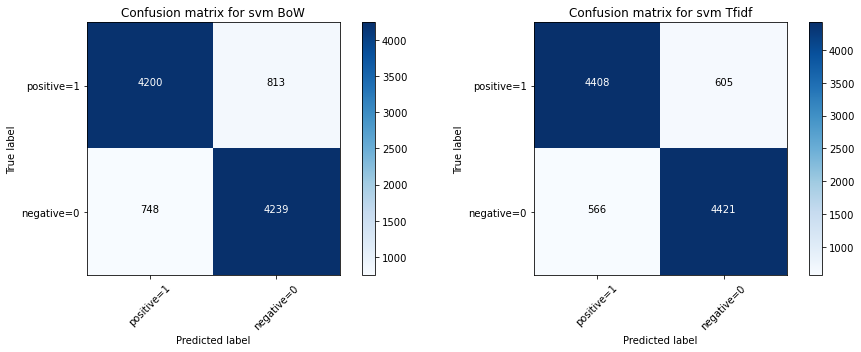

In [91]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_svm)
cnf_matrix1 = confusion_matrix(y_test, y_pred_svm_tf)
#print(cnf_matrix)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure(figsize=(13,5))
plt.subplot(1, 2, 1)
plot_confusion_matrix(cnf_matrix, classes=['positive=1','negative=0'],normalize= False,  title='Confusion matrix for svm BoW')
plt.subplot(1, 2, 2)
plot_confusion_matrix(cnf_matrix1, classes=['positive=1','negative=0'],normalize= False,  title='Confusion matrix for svm Tfidf')

***LSTM Model***

Detailed experiments on LSTM model are given in "LSTMExp.ipynb" file

In [ ]:
#We have already done splitting of our data into X_train,X_test,y_train and y_test
#Now we have data ready to create our model.

In [291]:
#X  with reviews
print(X_train.shape)
print(X_test.shape)
#y with sentiment targets, i.e., sentiment '0' or '1'
print(y_train.shape)
print(y_test.shape)

(40000,)
(10000,)
(40000,)
(10000,)


In [312]:
#We can also manually give max_length to our model, but we are calculating max_length from the mean of the reviews
#Calculating max length for padding the sequence
#Here instead of using this function we gave length as 130, because all our models with experiments are trained with 130.
#To fit in to the input we are manually assigning length.
'''
def get_max_length():
    review_length = []
    for review in X_train:
        review_length.append(len(review))

    return int(np.ceil(np.mean(review_length)))
'''

'\ndef get_max_length():\n    review_length = []\n    for review in X_train:\n        review_length.append(len(review))\n\n    return int(np.ceil(np.mean(review_length)))\n'

***Generating Feature***

In [96]:
#We are using Tokenizer here
# The tokenizer module creates a word to index dictionary.
# Each word is used as key while the corresponding unique index,
# is used as the value for the key.

token = Tokenizer(lower=False)    # no need lower, because already lowered the data in cleaning
token.fit_on_texts(X_train)
X_train_ls = token.texts_to_sequences(X_train)
X_test_ls = token.texts_to_sequences(X_test)

max_length = 130


In [97]:
print(len(X_train_ls[0]))

138


In [98]:
X_train_lstm = pad_sequences(X_train_ls, maxlen=max_length, padding='post', truncating='post')
X_test_lstm = pad_sequences(X_test_ls, maxlen=max_length, padding='post', truncating='post')

total_words = len(token.word_index) + 1   # adding 1 because of 0 padding

In [99]:
#We calculated max_length to make our encodings in equal size matrix.
print('Encoded X Train\n', X_train_lstm, '\n')
print('Encoded X Test\n', X_test_lstm, '\n')
print('Maximum review length: ', max_length)

Encoded X Train
 [[  694  3163 17588 ...  2452   314   324]
 [  526    22     8 ...   241   341   506]
 [  574   186     2 ...     2     3    36]
 ...
 [  139     2     4 ...     0     0     0]
 [    2  5770  2823 ...     1     1   530]
 [ 1920  1097   847 ...     0     0     0]] 

Encoded X Test
 [[ 1498  3883    33 ...     0     0     0]
 [ 1506  3046  3392 ...     0     0     0]
 [   71     2     4 ...    77    45 14367]
 ...
 [   18    44   175 ...     0     0     0]
 [  680  3595    61 ...     0     0     0]
 [  407   122    15 ...     0     0     0]] 

Maximum review length:  130


In [317]:
X_train_lstm.shape

(40000, 130)

In [318]:
y_train.shape

(40000,)

In [319]:
#All the reviews are transformed with length of 1003, reviews with less length are padded with zeros.
len(X_train_lstm[10])

130

In [323]:
#Building our model
#Architecture

# ARCHITECTURE
EMBED_DIM = 100
LSTM_OUT = 50

model = Sequential()
model.add(Embedding(total_words, EMBED_DIM, input_length = max_length))
model.add(LSTM(LSTM_OUT,return_sequences = True))
model.add(LSTM(25))

model.add(Dense(50,activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-7), loss = 'binary_crossentropy', metrics = ['accuracy'])

print(model.summary())


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 130, 100)          6474100   
_________________________________________________________________
lstm_15 (LSTM)               (None, 130, 50)           30200     
_________________________________________________________________
lstm_16 (LSTM)               (None, 25)                7600      
_________________________________________________________________
dense_15 (Dense)             (None, 50)                1300      
_________________________________________________________________
dropout_7 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 51        
Total params: 6,513,251
Trainable params: 6,513,251
Non-trainable params: 0
____________________________________________

In [324]:
file_name = 'LSTM_final1.h5'
checkpoint_path =os.path.join('models',file_name)

call_backs = tf.keras.callbacks.ModelCheckpoint(filepath =checkpoint_path,
                                               monitor ='val_accuracy',
                                               verbose =1,
                                               save_freq='epoch',
                                               save_best_only = False,
                                               save_weights_only= False,
                                             mode = 'max')
#started at 8:30
#Broke at 9:50 for 3 epochs for a total of 10 epochs due to urge of results
#As i observed overfitting after 2 epochs, since I stopped.

In [325]:
history = model.fit(X_train_lstm, y_train, epochs= 5,
                    batch_size = 128,validation_split = 0.2, verbose = 1,callbacks=call_backs)

Epoch 1/5
250/250 [==============================] - 127s 465ms/step - loss: 0.6929 - accuracy: 0.5132 - val_loss: 0.6921 - val_accuracy: 0.5544

Epoch 00001: saving model to models\LSTM_final1.h5
Epoch 2/5
250/250 [==============================] - 112s 450ms/step - loss: 0.5071 - accuracy: 0.7513 - val_loss: 0.3318 - val_accuracy: 0.8645

Epoch 00002: saving model to models\LSTM_final1.h5
Epoch 3/5
250/250 [==============================] - 113s 454ms/step - loss: 0.2764 - accuracy: 0.8998 - val_loss: 0.2946 - val_accuracy: 0.8785

Epoch 00003: saving model to models\LSTM_final1.h5
Epoch 4/5
250/250 [==============================] - 119s 475ms/step - loss: 0.1994 - accuracy: 0.9344 - val_loss: 0.3209 - val_accuracy: 0.8769

Epoch 00004: saving model to models\LSTM_final1.h5
Epoch 5/5
250/250 [==============================] - 123s 491ms/step - loss: 0.1517 - accuracy: 0.9547 - val_loss: 0.3436 - val_accuracy: 0.8676

Epoch 00005: saving model to models\LSTM_final1.h5


In [326]:
loaded_model = load_model('models/LSTM_final1.h5')

In [309]:
#loaded_model = load_model('models/LSTM3.h5')

In [ ]:
#pred = loaded_model.predict(X_test_lstm)

In [327]:
#This function helps us to plot learning curves
def plot_learningcurve(history,epochs):
    epoch_range = range(1,epochs+1)
    plt.plot(epoch_range,history.history['accuracy'])
    
    plt.plot(epoch_range,history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accurcay')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'],loc='upper left')
    plt.show()
    plt.plot(epoch_range,history.history['loss'])
    
    plt.plot(epoch_range,history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'],loc='upper left')
    plt.show()

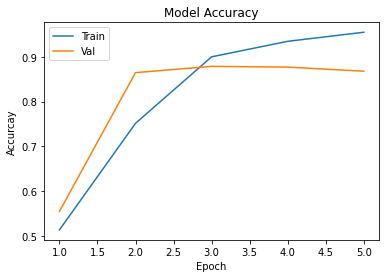

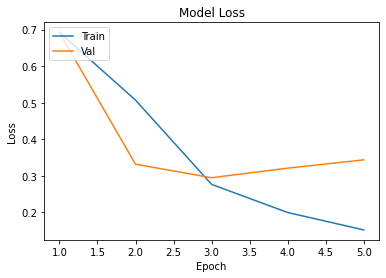

In [328]:
plot_learningcurve(history,5)

In [331]:
pred_list = model.predict(X_test_lstm)

In [332]:
#pred_list_test = loaded_model.predict(X_test_lstm)

In [336]:
#pred_list_test[0]

array([0.99], dtype=float32)

In [334]:
#Preprocessing our predictions to generate classification report
pred_list[0]
#Data type is float, we have to convert to int to perform evaluation.

array([0.99], dtype=float32)

In [335]:
y_pred= []
for i in pred_list:
    if i>0.5:
        
        y_pred.append(1)
    else:
        y_pred.append(0)


In [337]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      5013
           1       0.89      0.84      0.87      4987

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [339]:
print("accuracy for model with LSTM is ",metrics.accuracy_score(y_test,y_pred))

accuracy for model with LSTM is  0.869


In [340]:
history.history

{'loss': [0.6929177641868591,
  0.5071074366569519,
  0.2764304280281067,
  0.19937461614608765,
  0.1517355889081955],
 'accuracy': [0.5131562352180481,
  0.7512500286102295,
  0.8998125195503235,
  0.9344375133514404,
  0.9547187685966492],
 'val_loss': [0.6921126246452332,
  0.3317543864250183,
  0.2945933938026428,
  0.3208574652671814,
  0.34360963106155396],
 'val_accuracy': [0.5543749928474426,
  0.8644999861717224,
  0.8784999847412109,
  0.8768749833106995,
  0.8676249980926514]}

In [350]:
print(confusion_matrix(y_test, y_pred))

[[4486  527]
 [ 783 4204]]


Confusion matrix
[[4486  527]
 [ 783 4204]]


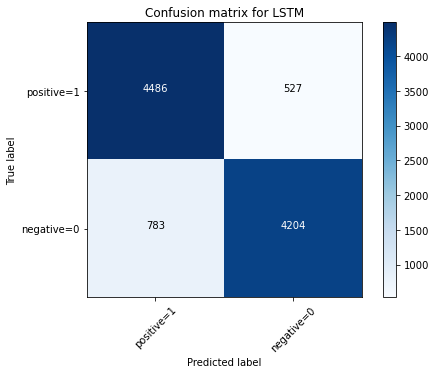

In [351]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
#nf_matrix1 = confusion_matrix(y_test, y_pred)
#print(cnf_matrix)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure(figsize=(13,5))
plt.subplot(1, 2, 1)
plot_confusion_matrix(cnf_matrix, classes=['positive=1','negative=0'],normalize= False,  title='Confusion matrix for LSTM')


In [362]:
y_test_pred=pred_list.reshape(pred_list.shape[0])


In [363]:
df_pred = pd.DataFrame(data={'y_actual': y_test, 'y_pred': y_test_pred})

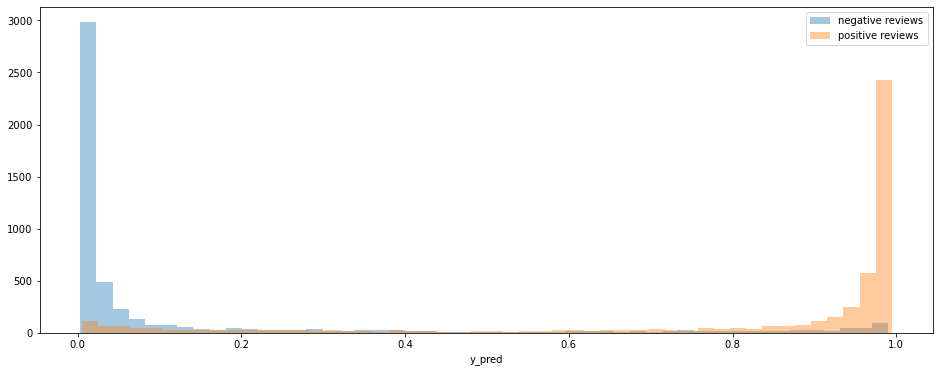

In [364]:
plt.figure(figsize=(16, 6))

msk = df_pred['y_actual'] == 0
sns.distplot(df_pred.loc[msk, 'y_pred'], label='negative reviews', kde=False)
sns.distplot(df_pred.loc[~msk, 'y_pred'], label='positive reviews', kde=False)
plt.legend()

In [355]:
#From this graph we can see that positive reviews predicted as negaative are very close to zero, same with negative also.

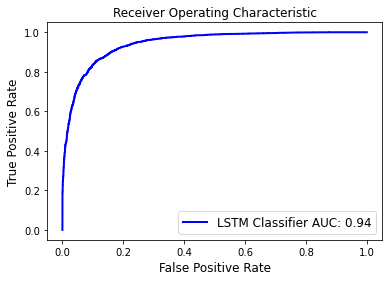

In [367]:
probs = pred_list
# Reading probability of second class (Salary >= $200K)
probs = probs[:, 0]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)
label = 'LSTM Classifier AUC:' + ' {0:.2f}'.format(roc_auc)
plt.plot(fpr, tpr, c = 'b', label = label, linewidth = 2)
plt.xlabel('False Positive Rate', fontsize = 12)
plt.ylabel('True Positive Rate', fontsize = 12)
plt.title('Receiver Operating Characteristic', fontsize = 12)
plt.legend(loc = 'lower right', fontsize = 12)

In [368]:
#The area under curve is 0.93 which is really amazing and provides the information that our model is performing great.

In [375]:
# create the model
EMBED_DIM = 100
LSTM_OUT = 50
max_length = 130

model2 = Sequential()
model2.add(Embedding(total_words, EMBED_DIM, input_length = max_length))
model2.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model2.add(MaxPooling1D(pool_size=2))
model2.add(LSTM(100))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model2.summary())

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 130, 100)          6474100   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 130, 32)           9632      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 65, 32)            0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 100)               53200     
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 101       
Total params: 6,537,033
Trainable params: 6,537,033
Non-trainable params: 0
_________________________________________________________________
None


In [376]:
file_name = 'LSTM_CNN.h5'
checkpoint_path =os.path.join('models',file_name)

call_backs = tf.keras.callbacks.ModelCheckpoint(filepath =checkpoint_path,
                                               monitor ='val_accuracy',
                                               verbose =1,
                                               save_freq='epoch',
                                               save_best_only = True,
                                               save_weights_only= False,
                                             mode = 'max')

In [377]:
history = model2.fit(X_train_lstm, y_train, epochs= 5,
                    batch_size = 128,validation_split = 0.2, verbose = 1,callbacks=call_backs)

Epoch 1/5
250/250 [==============================] - 84s 317ms/step - loss: 0.4352 - accuracy: 0.7793 - val_loss: 0.2970 - val_accuracy: 0.8784

Epoch 00001: val_accuracy improved from -inf to 0.87837, saving model to models\LSTM_CNN.h5
Epoch 2/5
250/250 [==============================] - 79s 314ms/step - loss: 0.2006 - accuracy: 0.9300 - val_loss: 0.3488 - val_accuracy: 0.8701

Epoch 00002: val_accuracy did not improve from 0.87837
Epoch 3/5
250/250 [==============================] - 82s 327ms/step - loss: 0.1052 - accuracy: 0.9669 - val_loss: 0.3708 - val_accuracy: 0.8702

Epoch 00003: val_accuracy did not improve from 0.87837
Epoch 4/5
250/250 [==============================] - 85s 340ms/step - loss: 0.0502 - accuracy: 0.9867 - val_loss: 0.4991 - val_accuracy: 0.8660

Epoch 00004: val_accuracy did not improve from 0.87837
Epoch 5/5
250/250 [==============================] - 75s 298ms/step - loss: 0.0305 - accuracy: 0.9929 - val_loss: 0.5539 - val_accuracy: 0.8224

Epoch 00005: val_a

In [379]:
loaded_model = load_model('models/LSTM_CNN.h5')

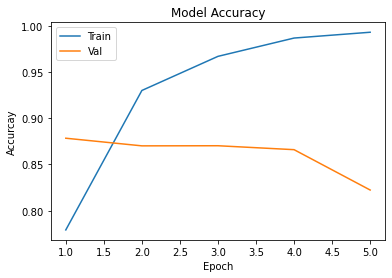

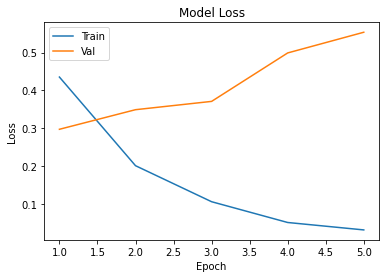

In [380]:
plot_learningcurve(history,5)

In [381]:
pred_list_2 = model2.predict(X_test_lstm)

In [382]:
y_pred= []
for i in pred_list_2:
    if i>0.5:
        
        y_pred.append(1)
    else:
        y_pred.append(0)


In [383]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.69      0.80      5013
           1       0.76      0.96      0.85      4987

    accuracy                           0.83     10000
   macro avg       0.85      0.83      0.82     10000
weighted avg       0.85      0.83      0.82     10000



In [384]:
print("accuracy for model with LSTM with CNN is ",metrics.accuracy_score(y_test,y_pred))

accuracy for model with LSTM with CNN is  0.826


Confusion matrix
[[3467 1546]
 [ 194 4793]]


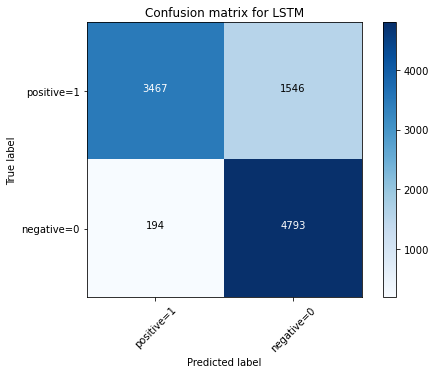

In [385]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
#nf_matrix1 = confusion_matrix(y_test, y_pred)
#print(cnf_matrix)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure(figsize=(13,5))
plt.subplot(1, 2, 1)
plot_confusion_matrix(cnf_matrix, classes=['positive=1','negative=0'],normalize= False,  title='Confusion matrix for LSTM')


In [386]:
y_test_pred=pred_list_2.reshape(pred_list_2.shape[0])


In [387]:
df_pred = pd.DataFrame(data={'y_actual': y_test, 'y_pred': y_test_pred})

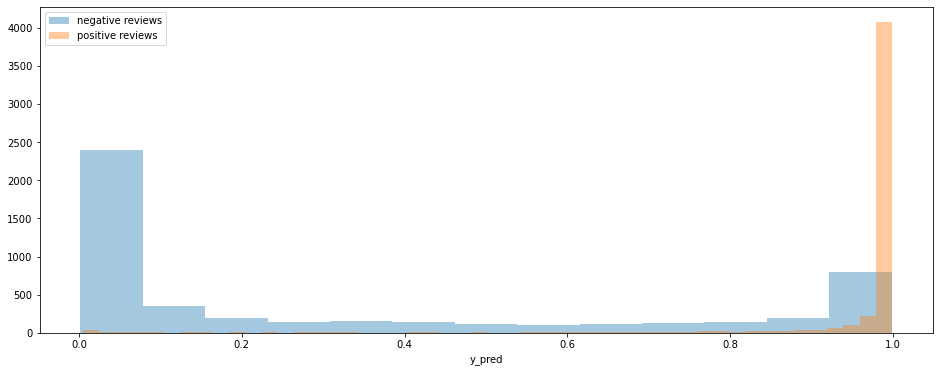

In [388]:
plt.figure(figsize=(16, 6))

msk = df_pred['y_actual'] == 0
sns.distplot(df_pred.loc[msk, 'y_pred'], label='negative reviews', kde=False)
sns.distplot(df_pred.loc[~msk, 'y_pred'], label='positive reviews', kde=False)
plt.legend()

In [396]:
# create the model
EMBED_DIM = 100
LSTM_OUT = 50
max_length = 130

model4 = Sequential()
model4.add(Embedding(total_words, EMBED_DIM, input_length = max_length))
model4.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model4.add(MaxPooling1D(pool_size=2))
model4.add(Dropout(0.5))
model4.add(LSTM(100))
model4.add(Dense(1, activation='sigmoid'))
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model4.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-7), loss = 'binary_crossentropy', metrics = ['accuracy'])
print(model4.summary())

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 130, 100)          6474100   
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 130, 32)           9632      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 65, 32)            0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 65, 32)            0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 100)               53200     
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 101       
Total params: 6,537,033
Trainable params: 6,537,033
Non-trainable params: 0
___________________________________________

In [397]:
file_name = 'LSTM_CNN3.h5'
checkpoint_path =os.path.join('models',file_name)

call_backs = tf.keras.callbacks.ModelCheckpoint(filepath =checkpoint_path,
                                               monitor ='val_accuracy',
                                               verbose =1,
                                               save_freq='epoch',
                                               save_best_only = True,
                                               save_weights_only= False,
                                             mode = 'max')

In [398]:
history = model4.fit(X_train_lstm, y_train, epochs= 5,
                    batch_size = 128,validation_split = 0.2, verbose = 1,callbacks=call_backs)

Epoch 1/5
250/250 [==============================] - 85s 320ms/step - loss: 0.6929 - accuracy: 0.5094 - val_loss: 0.6920 - val_accuracy: 0.5017

Epoch 00001: val_accuracy improved from -inf to 0.50175, saving model to models\LSTM_CNN3.h5
Epoch 2/5
250/250 [==============================] - 90s 362ms/step - loss: 0.4620 - accuracy: 0.7721 - val_loss: 0.3334 - val_accuracy: 0.8586

Epoch 00002: val_accuracy improved from 0.50175 to 0.85862, saving model to models\LSTM_CNN3.h5
Epoch 3/5
250/250 [==============================] - 87s 349ms/step - loss: 0.2796 - accuracy: 0.8868 - val_loss: 0.3100 - val_accuracy: 0.8694

Epoch 00003: val_accuracy improved from 0.85862 to 0.86937, saving model to models\LSTM_CNN3.h5
Epoch 4/5
250/250 [==============================] - 83s 332ms/step - loss: 0.2161 - accuracy: 0.9175 - val_loss: 0.2985 - val_accuracy: 0.8741

Epoch 00004: val_accuracy improved from 0.86937 to 0.87413, saving model to models\LSTM_CNN3.h5
Epoch 5/5
250/250 [====================

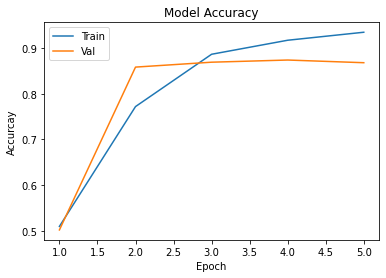

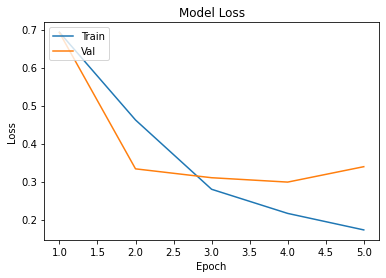

In [399]:
plot_learningcurve(history,5)

In [100]:
loaded_model= load_model('models/LSTM_CNN.h5')

In [102]:
pred_list_4 = loaded_model.predict(X_test_lstm)

In [103]:
pred_list_4[0]

array([0.98], dtype=float32)

In [104]:
y_pred_4= []
for i in pred_list_4:
    if i>0.5:
        
        y_pred_4.append(1)
    else:
        y_pred_4.append(0)


In [105]:
print("accuracy for model with LSTM with CNN is model4 ",metrics.accuracy_score(y_test,y_pred_4))

accuracy for model with LSTM with CNN is model4  0.8788


In [106]:
print(classification_report(y_test,y_pred_4))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      5013
           1       0.88      0.87      0.88      4987

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



Confusion matrix
[[4432  581]
 [ 631 4356]]


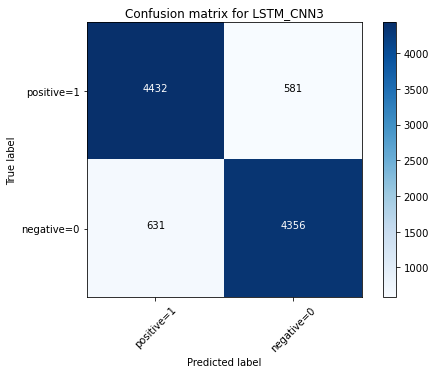

In [107]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_4)
#nf_matrix1 = confusion_matrix(y_test, y_pred)
#print(cnf_matrix)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure(figsize=(13,5))
plt.subplot(1, 2, 1)
plot_confusion_matrix(cnf_matrix, classes=['positive=1','negative=0'],normalize= False,  title='Confusion matrix for LSTM_CNN3')


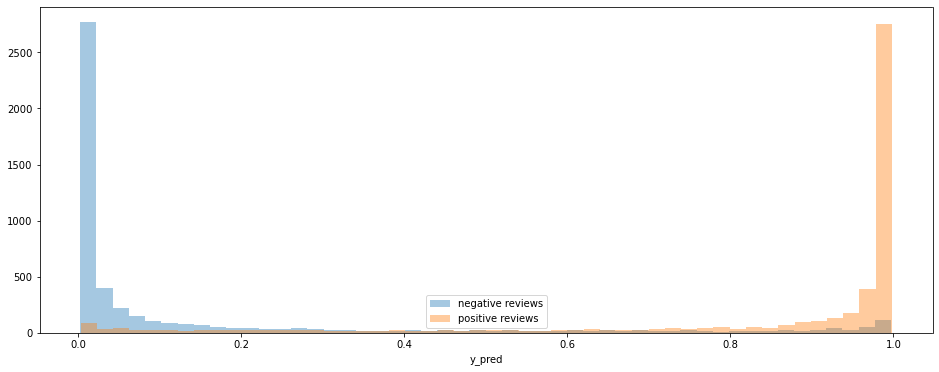

In [410]:
y_test_pred=pred_list_4.reshape(pred_list_4.shape[0])
df_pred = pd.DataFrame(data={'y_actual': y_test, 'y_pred': y_test_pred})
plt.figure(figsize=(16, 6))

msk = df_pred['y_actual'] == 0
sns.distplot(df_pred.loc[msk, 'y_pred'], label='negative reviews', kde=False)
sns.distplot(df_pred.loc[~msk, 'y_pred'], label='positive reviews', kde=False)
plt.legend()

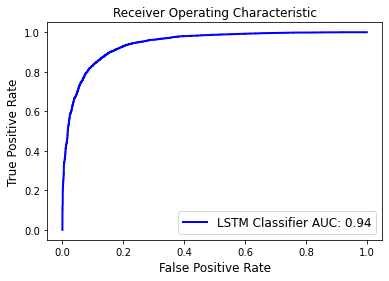

In [411]:
probs = pred_list_4
# Reading probability of second class (Salary >= $200K)
probs = probs[:, 0]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)
label = 'LSTM Classifier AUC:' + ' {0:.2f}'.format(roc_auc)
plt.plot(fpr, tpr, c = 'b', label = label, linewidth = 2)
plt.xlabel('False Positive Rate', fontsize = 12)
plt.ylabel('True Positive Rate', fontsize = 12)
plt.title('Receiver Operating Characteristic', fontsize = 12)
plt.legend(loc = 'lower right', fontsize = 12)

***Real-Time data prediction****

In [424]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gayat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [452]:
from nltk.corpus import stopwords

In [453]:
review = "Nothing was typical about this. Everything was beautifully done in this movie, the story, the flow, the scenario, everything. I highly recommend it for mystery lovers, for anyone who wants to watch a good movie!"
# Pre-process input
regex = re.compile(r'[^a-zA-Z\s]')
review = regex.sub('', review)
#print('Cleaned: ', review)
english_stops = set(stopwords.words('english'))
words = review.split(' ')
filtered = [w for w in words if w not in english_stops]
filtered = ' '.join(filtered)
filtered = [filtered.lower()]
tokenize_words = token.texts_to_sequences(filtered)
tokenize_words = pad_sequences(tokenize_words, maxlen=max_length, padding='post', truncating='post')

In [454]:
tokenize_words.shape

(1, 130)

In [455]:
loaded_model =load_model('models/LSTM_CNN3.h5')

In [456]:
result = loaded_model.predict(tokenize_words)
print(result)


[[0.4]]


In [459]:
if result>0.5:
    print("Positive(1) review")
else:
    print("Negative(0) review")

Negative(0) review


In [469]:
def predict_CNN_review(review):
    regex = re.compile(r'[^a-zA-Z\s]')
    review = regex.sub('', review)
    #print('Cleaned: ', review)
    english_stops = set(stopwords.words('english'))
    words = review.split(' ')
    filtered = [w for w in words if w not in english_stops]
    filtered = ' '.join(filtered)
    filtered = [filtered.lower()]
    tokenize_words = token.texts_to_sequences(filtered)
    tokenize_words = pad_sequences(tokenize_words, maxlen=max_length, padding='post', truncating='post')
    loaded_model =load_model('models/LSTM_CNN3.h5')
    result = loaded_model.predict(tokenize_words)
    #print(result)
    if result>0.5:
        return "Positive(1) review"
    else:
        return "Negative(0) review"



In [473]:
#This review is originally rated 6 on the website

Custom_review1 =""" Why did you come here? What do you expect? The fast Saga - a movie that makes not much sense, but is pure "popcorn" if there is such a thing. We have new "milestones" ahead of us though. One is family related - pun intended, as is the cliche we get served here. Talking of cliches we get a beloved character back ... like they used to do in soaps ... because ... there are no rules.

Well no rules that the real world would set - boundaries and all that. I mean even Paul Walkers character is still alive in this - even if we never see him. He is family - and family holds together and never dies (are they Goonies?).

80s movie reference aside this is what fans should and probably will expect. Including the long awaited and completely insane ... well out of this world moment! And then add some of the most insane stunts and this should be one of the craziest (best?) movie/theatre experiences you can get.

Again it doesn't make much sense (or any to be fair), but it is fun to watch. And why should you not have fun ... the soundtrack is hot, the muscles and the cars are hot ... the players are hot ... there is literally nothing that is below "hot" ... well there is one moment that is described as cold ... fair enough, but other than that: Hot! Even new additions to the cast - ones that probably are going to return and some that are just flavor of the month/fan service ... get with it or leave it seems to be what the movie is suggesting ..."""


In [474]:
predict_CNN_review(Custom_review1)

'Positive(1) review'

In [475]:
#Took the reviews from Imdb website which as '6','5','10' ratings
#Ref:https://www.imdb.com/title/tt5433138/reviews?ref_=tt_sa_3

#Below is the 1 rated review on the website

Custom_review2 = """ I am a huge fan of this franchise. And i watched all 9 movies again before F9. Here are my ratings for reference:

(1) original 8/10... (2) 2 fast 7/10... (3) tokyo drift 3/10... (4) fast & furious 7/10... (5) fast 5 - 8/10... (6) fast & furious 6 - 8/10... (7) furious 7 - 4/10... (8) fate 8/10... (9) hobbs and shaw 2/10...

in my review for hobbs and shaw, i said i hope f9 doesn't continue with the madness introduced in that movie. And in a way it doesn't. There are no super soldiers. And it doesn't switch to the sci-fi genre (for the most part). But in another way, it continues exactly where hobbs and shaw left off. Completely ridiculous action that is not the least bit believable and disregards the most basic laws of physics.

And i could tell from the first action scene. I tried to be patient, but it got worse and worse. This series has always pushed the limits, but they've lost all restraint and do whatever they want, no matter how stupid. I groaned and rolled my eyes so many times. Some parts were so dumb that i straight up closed my eyes for 5 seconds cause i couldn't handle it. And it's not just a random thing here or there. It's the majority of the action.

A quote from my hobbs and shaw review: "I always say the best action movies toe the line between improbable and impossible. To quote joey from friends, 'you're so far past the line that you can't even see the line! The line is a dot to you!' lmao."

On top of that, none of it is good. Even if you suspend disbelief, nothing about the action is impressive. Not one scene wowed me or gave me goosebumps. Even the fight scenes are crap. At one point i stopped caring about the action at all. And this is coming from an action junkie. By comparison, f8 had multiple BEASTLY action scenes that had my jaw dropped.

Aside from the action, this movie just isn't good. The story is useless. They tried to have character moments, but they didn't work for me. Which is odd because i'm already invested in all these characters. Most of the comedy doesn't work. And some of it is done at the expense of realism (they do something that makes no sense so they can joke about it).

My other biggest gripe: rewriting history. Apparently the trailer spoiled this, which is why i don't watch trailers. But they are pooping on their own franchise by changing past events. And you can argue that the franchise has done this before, but it was more of adding on to the story. Whereas with this movie, it really feels like they were pulling stuff out of their butts

did i mention it's really dumb? Unfathomably dumb. You know the overused phrase "i could feel myself getting dumber"? I really really could. I found myself mouth-breathing with my eye lids half shut lol

What a waste of charlize theron. I was so happy she survived f8. She's a BEAST of an actress (FURIOSA!), and i liked her villain. But she was literally in a box for the majority of the movie. Also, the Rock has become a staple of this franchise. Why is he not in this movie? Instead we get john cena. Sigh.

Racking my brain trying to come up with a positive. All i got is the musical score. Or at least one track was awesome. They played it during the end credits.

My entire theater clapped when it finished. Ppl are stupid. But that means we'll probably get another one. Hopefully they can right the ship. But i don't have much confidence in that happening.

There is so much more i can talk about. I can't remember it all. But i'm sad and disappointed. My wait for good post-pandemic movies continues. So far i can think of one (a quiet place 2). And that's out of like 15-20 movies i've seen. (1 viewing, 6/24/2021)"""

In [476]:
predict_CNN_review(Custom_review2)

'Negative(0) review'

In [477]:
# 8 rated review
Custom_review3=""" I think the people in charge of IMDB should add Sci-Fi to the genres and I understand the hate. Regardless of the flaws especially one being there's probably 20 parts where some of the characters should've died I hope I'm not the only one to feel this way otherwise Fast 9 is exhilarating fun most of the way of through. A hilarious side note the theater I go to has recliner seats and someone fairly fat broke the seat to the right of me lol! The best aspects are the action, comedy, and the cinematography; the story is kinda cheesy. Like my review or don't but I'm being nice with my rating. Aww come on the review is good I mean the movie is pretty good."""

In [478]:
predict_CNN_review(Custom_review3)

'Positive(1) review'